In [70]:
from keras.models import load_model
import numpy as np
import pandas as pd

In [76]:
model = load_model('Trained Models/model-cad.h5')

In [77]:
data=pd.read_pickle('cad-ad.pkl')

In [78]:
data.head()

,text,label,name,split,ind,lb,lens
0,\n\nRecord date: 2106-02-12\n\nCampbell Orthop...,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1]",100,"[cad, cad, ischemia, cad, cad, cad, cad, carbo...","[105, 105, 221, 105, 105, 105, 105, 117, 148, ...",1,17
1,\n\nRecord date: 2079-05-12\n\n\n\n\n\nMERCY C...,"[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]",101,[cad],[105],1,1
2,\n\nRecord date: 2120-09-19\n\nPersonal Data a...,"[1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0]",102,"[an, angina, cad, cad]","[67, 69, 105, 105]",1,8
3,\n\nRecord date: 2067-11-24\n\n ...,"[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]",103,"[unstable, angina, her, anginal]","[384, 69, 195, 69]",1,7
4,\n\nRecord date: 2094-02-16\n\nJENNIFER BOOKER...,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1]",104,"[tegretol, (carbamazepine), tegretol, (carbama...","[367, 18, 367, 18, 297, 394, 79, 370, 221, 46,...",1,14


In [74]:
data['lb']=data.label.map(lambda x: x[5])

In [79]:
train=data.sample(frac=0.8,random_state=100)
test=data.drop(train.index)

train.shape, test.shape

((160, 7), (40, 7))

In [80]:
from keras.preprocessing import sequence

data['lens'] = data.ind.map(lambda x: len(x))
maxlen = max(data.lens)
data = data[data.lens != 0]
maxlen

77

In [81]:
data = data[data.lens < 5000]
maxlen = max(data.lens)

In [82]:
X_train = sequence.pad_sequences(train.ind, maxlen=maxlen)
X_train = np.array([x.ravel() for x in X_train])


In [84]:
y_train = np.array([x for x in train.lb])
y_train.shape

(160,)

In [85]:
X_test = sequence.pad_sequences(test.ind, maxlen=maxlen)
X_test = np.array([x.ravel() for x in X_test])

In [87]:
Y_test = np.array([x for x in test.lb])
Y_test

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [88]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

ValueError: Error when checking input: expected embedding_2_input to have shape (None, 100) but got array with shape (40, 77)

In [62]:
prediction = model.predict(np.array(X_test))
df=pd.DataFrame(columns=["pr", "lb"])
df.pr=list(prediction)
df.lb=list(Y_test)
df['res']=df.pr.map(lambda x: 1 if x>0.5 else 0)
df['id']=list(test.name)
df['idlb']=list(test.label.map(lambda x: x[10]))

In [63]:
df

,pr,lb,res,id,idlb
0,[0.746049],1,1,104,1
1,[0.868953],1,1,109,1
2,[0.995285],1,1,116,1
3,[0.993352],1,1,129,1
4,[0.137462],0,0,146,0
5,[0.998182],1,1,168,1
6,[0.137462],1,0,174,1
7,[0.974505],1,1,180,1
8,[0.927101],1,1,183,1
9,[0.992156],1,1,184,1


In [64]:
i=0
a=0
for index, row in df.iterrows():
    if row.lb==0:
        a=a+1
        if (row.lb==row.res) :
            i=i+1
i/a

1.0

In [65]:
i=0
a=0
for index, row in df.iterrows():
    if row.lb==1:
        a=a+1
        if (row.lb==row.res) :
            i=i+1
i/a

0.8518518518518519

In [66]:
from collections import defaultdict
import operator
from sklearn.metrics import accuracy_score, f1_score

I = [1,0]

f1_score(df.lb, df.res, labels=I, average='macro')

0.89333333333333331

In [67]:
guess = model.predict_classes(X_test)
guess = [g[0] for g in guess]
gold = Y_test
guess[:5], gold[:5]

([1, 1, 1, 1, 0], array([1, 1, 1, 1, 0], dtype=int64))

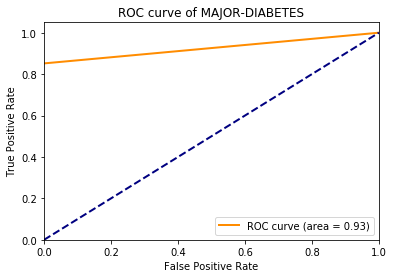

In [69]:
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 

x, y, _ = metrics.roc_curve(gold, guess)
auc = metrics.auc(x, y)

plt.figure()
lw = 2
plt.plot(x, y, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of MAJOR-DIABETES')
plt.legend(loc="lower right")
plt.show()


In [45]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test, Y_test)

0.57499999999999996